<a href="https://colab.research.google.com/github/miras1109/A-Comparative-Study-of-Decision-Tree-Random-Forest-KNN-DBSCAN-and-SVM-XGBoost-for-Football-Analytics/blob/main/SVMansXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# Laboratory Work 6: SVM and XGBoost
# Using players_data-2024_2025.csv
# ===============================

# --- Step 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Step 2. Load and Inspect Dataset ---
df = pd.read_csv("players_data-2024_2025.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns[:15].tolist())  # show only first 15 columns
print(df.head())

Dataset shape: (2854, 267)
Columns: ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A']
   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Att (GK)  Thr  Launch%  AvgLen  Opp  Stp  \
0  24.0  2000.0   3       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
1  24.0  2000.0   4       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
2  21.0  2003.0   1       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
3  20.0  2004.0   6       0  ...       NaN  NaN      NaN     NaN  NaN  N

In [ ]:
# --- Step 3. Select Target and Features ---
# We'll predict the player's position ('Pos') based on numeric features
target_column = 'Pos'

# Drop non-numeric and irrelevant columns
X = df.select_dtypes(include=[np.number]).copy()

# Handle missing values (fill with mean)
X = X.fillna(X.mean())

# Encode the target variable (Pos: DF, MF, FW, etc.)
le = LabelEncoder()
y = le.fit_transform(df[target_column].astype(str))

# --- Step 4. Split Data into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# --- Step 5. Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# 🧠 Step 6. Implement SVM
# ===============================
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_svm = svm_model.predict(X_test)

print("\n=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



=== SVM Evaluation ===
Accuracy: 0.662777129521587

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       252
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        38
           3       0.60      0.62      0.61       110
           4       0.00      0.00      0.00         9
           5       0.41      0.48      0.44        98
           6       0.96      1.00      0.98        67
           7       0.67      0.74      0.71       183
           8       0.00      0.00      0.00        19
           9       0.33      0.14      0.19        66

    accuracy                           0.66       857
   macro avg       0.37      0.39      0.38       857
weighted avg       0.58      0.66      0.61       857


Confusion Matrix:
 [[241   0   0   4   0   0   1   6   0   0]
 [  9   0   0   0   0   2   0   2   0   2]
 [ 31   0   0   0   0   3   0   4   0   0]
 [  9   0   0  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:24:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Evaluation ===
Accuracy: 0.7001166861143524

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       252
           1       0.29      0.13      0.18        15
           2       0.00      0.00      0.00        38
           3       0.60      0.64      0.62       110
           4       0.00      0.00      0.00         9
           5       0.47      0.49      0.48        98
           6       1.00      1.00      1.00        67
           7       0.72      0.83      0.77       183
           8       0.33      0.16      0.21        19
           9       0.41      0.29      0.34        66

    accuracy                           0.70       857
   macro avg       0.46      0.45      0.45       857
weighted avg       0.65      0.70      0.67       857


Confusion Matrix:
 [[240   2   2   0   0   0   0   8   0   0]
 [  9   2   1   0   0   0   0   1   1   1]
 [ 31   2   0   0   0   1   0   2   2   0]
 [  1   0 

/tmp/ipython-input-4096268443.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


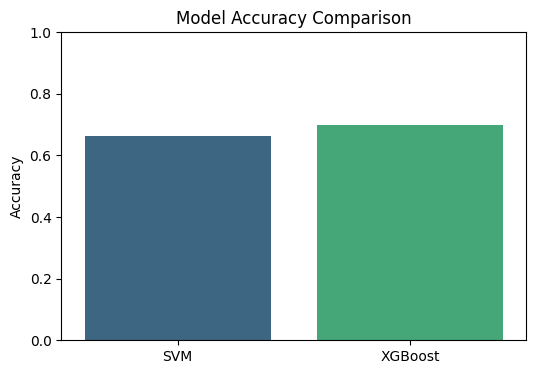

In [ ]:
# ===============================
# 🌲 Step 7. Implement XGBoost
# ===============================
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBoost Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# ===============================
# 📊 Step 8. Compare Model Accuracies
# ===============================
models = ['SVM', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()